<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning_workshop/blob/master/multilayer_perceptron/13_workshop_MNIST_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


# **LOAD DATA**

---



In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()



# **Holdount**

---



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 1234, stratify=y_train)

In [4]:
print(f'Dimensiones del conjunto de características de train: {X_train.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {y_train.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {X_test.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {y_test.shape}')
print(f'Dimensiones del conjunto de etiquetas de test: {X_valid.shape}')
print(f'Dimensiones del conjunto de etiquetas de test: {y_valid.shape}')

Dimensiones del conjunto de características de train: (54000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (54000,)
Dimensiones del conjunto de etiquetas de train: (6000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (6000,)
Dimensiones del conjunto de etiquetas de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


# **Plot**

---



In [5]:
def show_image(images, gray = True):
  fig = plt.figure(figsize=(8,8))
  index = np.random.randint(len(images), size = 100)
  for i in range(100):
    fig.add_subplot(10,10, i + 1)
    plt.axis('off')
    if gray:
      color = 'gray'
    else:
      color = None
    plt.imshow(images[index[i]], cmap = color)
plt.show()

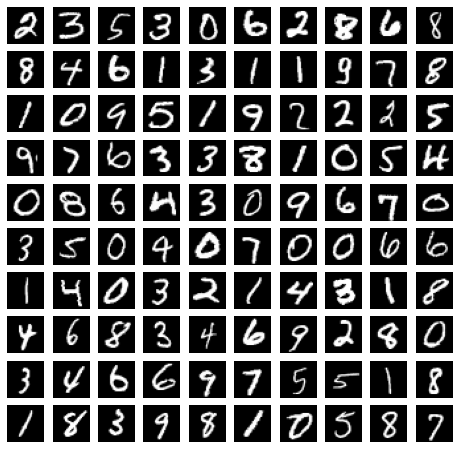

In [6]:
show_image(X_train)

In [7]:
X_train.shape

(54000, 28, 28)

# **Reestructuración y Normalización** 

---



In [8]:
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255


X_valid = X_valid.astype('float32')
X_valid /= 255

In [9]:
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = to_categorical(y_train, num_classes=10)

print("Dimensiones del conjunto de características de train aplanadas: {}".format(X_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))

Dimensiones del conjunto de características de train aplanadas: (54000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (54000, 10)


In [10]:
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = to_categorical(y_test, num_classes=10)

print("Dimensiones del conjunto de características de test aplanadas: {}".format(X_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

Dimensiones del conjunto de características de test aplanadas: (6000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (6000, 10)


In [11]:
X_valid = X_valid.reshape(X_valid.shape[0], -1)
y_valid = to_categorical(y_valid, num_classes=10)

print("Dimensiones del conjunto de características de validación aplanadas: {}".format(X_valid.shape))
print("Dimensiones del conjunto de etiquetas de validación en one hot: {}".format(y_valid.shape))

Dimensiones del conjunto de características de validación aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de validación en one hot: (10000, 10)


# **Model**

---



In [12]:
#Define el modelo
model = Sequential()
model.add(Dense(32, input_shape = (784,), activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(32, activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


# **Compile and fit**

---



In [14]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=128, verbose=0)

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


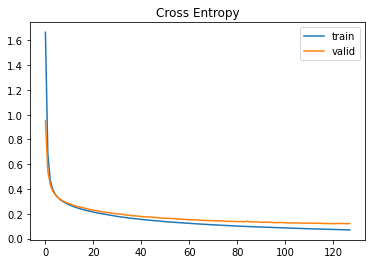

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

- Los errores logran converger, por lo tanto no parece haber overfitting

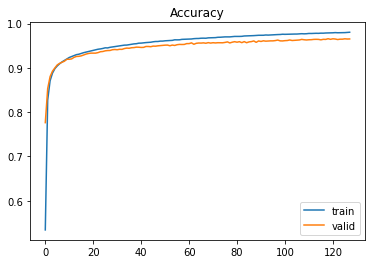

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

Predictions with keras
- predict: la salida de la última capa.
- predict_proba: las probabilidades normalizadas de las salidas (si nuestra red ya incluye softmax al final, el resultado es el mismo que la función anterior).
- predict_class: la clase predicha, equivalente al argmax a las funciones anteriores.

#**Predictions about data test**

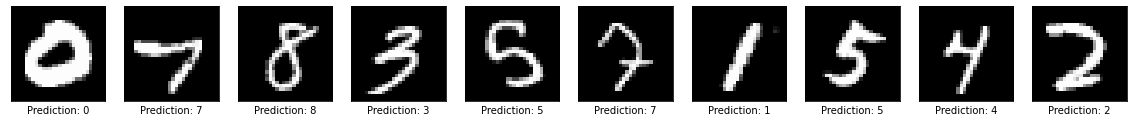

In [18]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(X_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(X_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

# **Predictions about data validate**

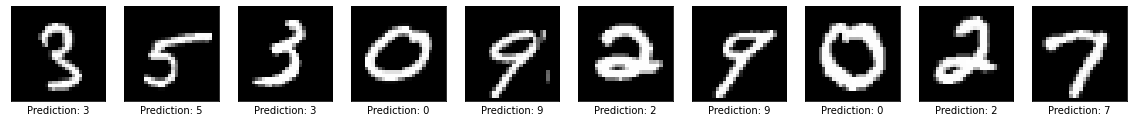

In [19]:
predictions = model.predict(X_valid)
predictions = np.argmax(predictions, axis=1)
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(X_valid), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(X_valid[index[i]].reshape((28,28)), cmap='gray')
plt.show()

# **Evualación**

In [21]:
# Evaluate datos de entrenamiento
score = model.evaluate(X_train, y_train)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0690 - accuracy: 0.9807
Loss: 0.06898760050535202
Accuracy: 0.9806851744651794


In [22]:
# Evaluate datos de test
score = model.evaluate(X_test, y_test)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

188/188 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9652
Loss: 0.12137657403945923
Accuracy: 0.9651666879653931


In [23]:
# Evaluate datos de valid
score = model.evaluate(X_valid, y_valid)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

313/313 [==============================] - 0s 2ms/step - loss: 0.1210 - accuracy: 0.9666
Loss: 0.12095349282026291
Accuracy: 0.9666000008583069
